3. Import the required packages with their customary aliases as follows:


In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df=pd.read_csv('..\data\gdp_percapita.csv')

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.shape

(7176, 4)

In [4]:
type(gdp_df)

pandas.core.frame.DataFrame

In [5]:
type('Year')

str

In [6]:
type('Country or Area')

str

In [7]:
type('Value')

str

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [9]:
gdp_df.columns = ['Country','Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [10]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [18]:
country_count = gdp_df.Country.value_counts().to_frame().reset_index()

In [19]:
country_count

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [21]:
country_count.columns =['country','count']

In [24]:
year_counts = gdp_df.Year.value_counts().to_frame().reset_index()

In [25]:
year_counts.columns = ['year','count']

In [26]:
year_counts = year_counts.sort_values('year')

In [28]:
year_counts

,year,count
30,1990,206
29,1991,207
28,1992,208
27,1993,209
26,1994,211
25,1995,222
24,1996,222
23,1997,226
22,1998,226
21,1999,227


<AxesSubplot:xlabel='year', ylabel='count'>

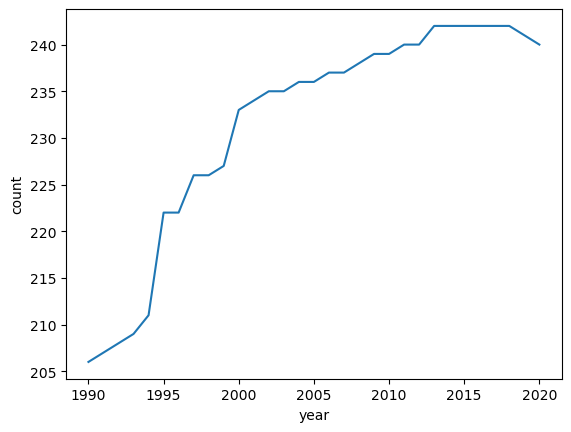

In [27]:
sns.lineplot(data = year_counts, x = 'year', y = 'count')

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [29]:
year_2020 = gdp_df.loc[gdp_df['Year']==2020]
year_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Count'>

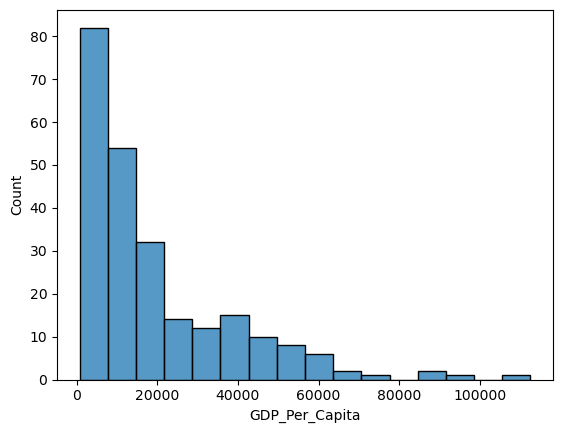

In [30]:
sns.histplot(data = year_2020, x = 'GDP_Per_Capita')

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

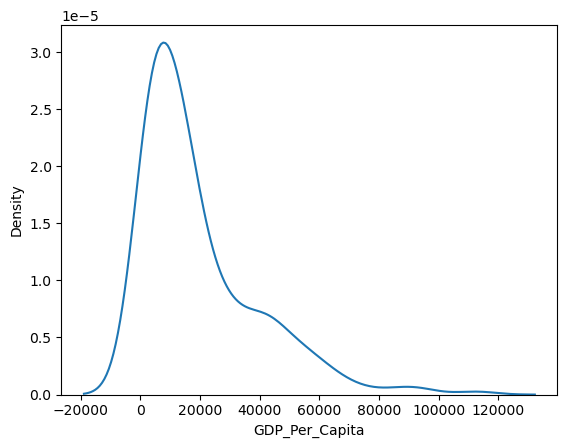

In [31]:
sns.kdeplot(data = year_2020, x='GDP_Per_Capita')

<AxesSubplot:xlabel='GDP_Per_Capita'>

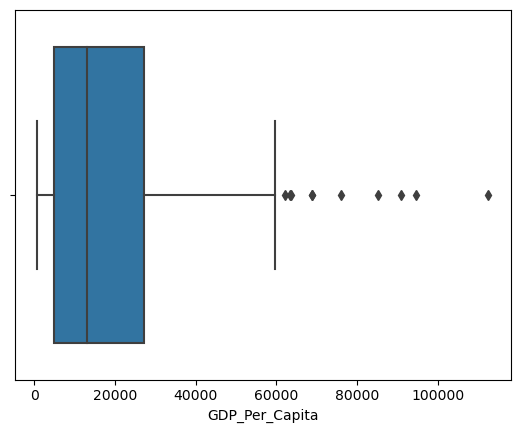

In [32]:
sns.boxplot(data = year_2020, x = "GDP_Per_Capita")

<AxesSubplot:xlabel='GDP_Per_Capita'>

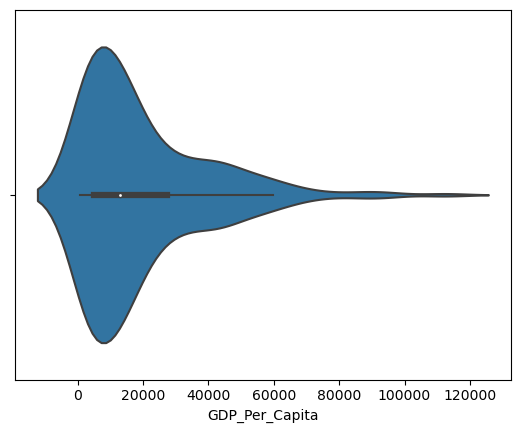

In [39]:
sns.violinplot(data = year_2020, x = 'GDP_Per_Capita')

9. What was the median GDP per capita value in 2020?

In [33]:
year_2020.GDP_Per_Capita.median()

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [34]:
gdp = gdp_df.GDP_Per_Capita > 100000
gdp

0       False
1       False
2       False
3       False
4       False
        ...  
7171    False
7172    False
7173    False
7174    False
7175    False
Name: GDP_Per_Capita, Length: 7176, dtype: bool

In [35]:
type(gdp)

pandas.core.series.Series

In [36]:
gdp1 = gdp_df.loc[gdp]['Year'].min()
gdp1

1990

In [37]:
gdp_df.loc[gdp_df.Year == 1990][gdp_df.GDP_Per_Capita>100000]

C:\Users\eykin\AppData\Local\Temp\ipykernel_32544\2375269515.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gdp_df.loc[gdp_df.Year == 1990][gdp_df.GDP_Per_Capita>100000]


,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [56]:
richest_2020 = year_2020.nlargest(1,'GDP_Per_Capita')
richest_2020

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


In [49]:
year_2020.sort_values('GDP_Per_Capita', ascending = False).reset_index()

,index,Country,Year,GDP_Per_Capita
0,3882,Luxembourg,2020,112557.309472
1,5720,Singapore,2020,94505.636160
2,3071,Ireland,2020,90789.221024
3,5381,Qatar,2020,85290.450430
4,639,Bermuda,2020,76105.138057
...,...,...,...,...
235,4750,Niger,2020,1221.269930
236,5871,Somalia,2020,1180.965971
237,1524,Dem. Rep. Congo,2020,1082.445242
238,1136,Central African Republic,2020,937.856470


In [57]:
richest_history = gdp_df[gdp_df.Country == 'Luxembourg'].sort_values('Year').reset_index(drop=True)
richest_history

,Country,Year,GDP_Per_Capita
0,Luxembourg,1990,70860.819124
1,Luxembourg,1991,75961.668717
2,Luxembourg,1992,76323.304753
3,Luxembourg,1993,78468.921760
4,Luxembourg,1994,80365.224508
5,Luxembourg,1995,80379.127629
6,Luxembourg,1996,80401.032017
7,Luxembourg,1997,83702.813530
8,Luxembourg,1998,88185.800110
9,Luxembourg,1999,94115.384035


13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

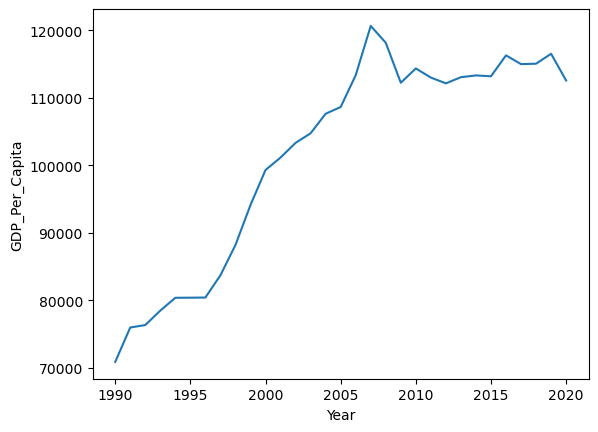

In [58]:
sns.lineplot(data = richest_history, x = 'Year', y = 'GDP_Per_Capita')

In [60]:
poorest_2020 = year_2020.nsmallest(1,"GDP_Per_Capita")

In [61]:
poorest_history = gdp_df.loc[gdp_df.Country == 'Burundi'].sort_values('Year').reset_index(drop=True)

<AxesSubplot:xlabel='Year', ylabel='GDP_Per_Capita'>

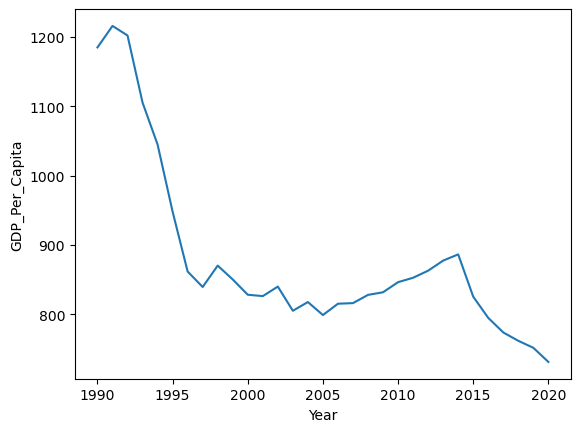

In [62]:
sns.lineplot(data = poorest_history, x='Year', y = 'GDP_Per_Capita')

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [63]:

internet_df=pd.read_csv('..\data\internet_use.csv', nrows = 4495)

In [64]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [65]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [66]:
type('Country')

str

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [68]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [69]:

internet_df.columns = ['Country','Year', 'Internet_Users_Pct'] 
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?



### Different than GDP, percentage increases as the years increase

17. What is the first year to have a non-zero internet users percentage value?

In [73]:
internet = internet_df.Internet_Users_Pct >0
internet

0        True
1        True
2        True
3        True
4        True
        ...  
4490     True
4491     True
4492     True
4493     True
4494    False
Name: Internet_Users_Pct, Length: 4495, dtype: bool

In [74]:
internet_df.loc[internet]['Year'].min()

1990

In [76]:
internet_df.loc[internet_df.Year == 1990][internet_df.Internet_Users_Pct > 0]

C:\Users\eykin\AppData\Local\Temp\ipykernel_32544\4102899238.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  internet_df.loc[internet_df.Year == 1990][internet_df.Internet_Users_Pct > 0]


,Country,Year,Internet_Users_Pct
204,Australia,1990,0.585095
229,Austria,1990,0.130369
375,Belgium,1990,0.001007
728,Canada,1990,0.361000
1107,Denmark,1990,0.097277
1388,Finland,1990,0.401088
1413,France,1990,0.052778
1535,Germany,1990,0.125892
2023,Israel,1990,0.110774
2048,Italy,1990,0.017545


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [98]:
two_internet_years = internet_df[internet_df.Year.isin([2000,2014])]

<AxesSubplot:xlabel='Year', ylabel='Internet_Users_Pct'>

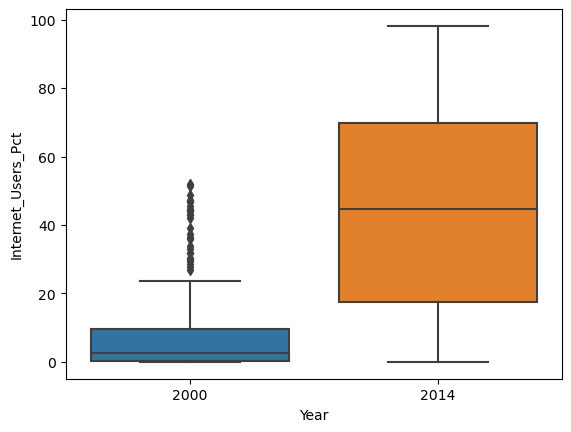

In [99]:
sns.boxplot(data = two_internet_years, x='Year', y = 'Internet_Users_Pct')

19. For how many countries was the percentage of internet users below 5% in 2014?


In [93]:
len(internet_df.loc[internet_df.Year == 2014])

202

In [94]:
len(internet_df.loc[internet_df.Internet_Users_Pct < 5])

2214

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [100]:
gdp_internet_use = pd.merge(internet_df, gdp_df, on=['Country','Year'], how = 'outer')

In [101]:
gdp_internet_use.tail

<bound method NDFrame.tail of           Country  Year  Internet_Users_Pct  GDP_Per_Capita
0     Afghanistan  2014            6.390000     2102.384604
1     Afghanistan  2013            5.900000     2116.465258
2     Afghanistan  2012            5.454545     2075.491614
3     Afghanistan  2011            5.000000     1904.559926
4     Afghanistan  2010            4.000000     1957.029070
...           ...   ...                 ...             ...
8251     Zimbabwe  2016                 NaN     2341.304920
8252     Zimbabwe  2015                 NaN     2360.022385
8253     Zimbabwe  1993                 NaN     2420.092791
8254     Zimbabwe  1992                 NaN     2437.152908
8255     Zimbabwe  1991                 NaN     2733.696626

[8256 rows x 4 columns]>

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?


In [102]:
internet_2014 = internet_df.loc[internet_df.Year == 2014]

In [107]:
top3_list = internet_2014.sort_values('Internet_Users_Pct', ascending = False).head(3)

In [108]:
top3_list

,Country,Year,Internet_Users_Pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30


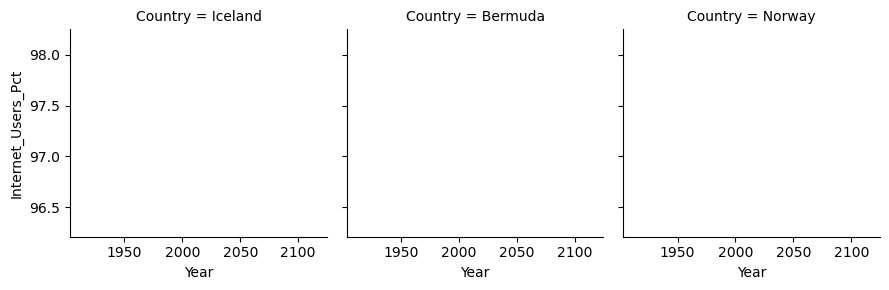

In [121]:
g=sns.FacetGrid(top3_list, col = 'Country')
g.map(sns.lineplot,'Year', 'Internet_Users_Pct')

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [122]:
gdp_internet_use_2014 = gdp_internet_use.loc[gdp_internet_use.Year == 2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

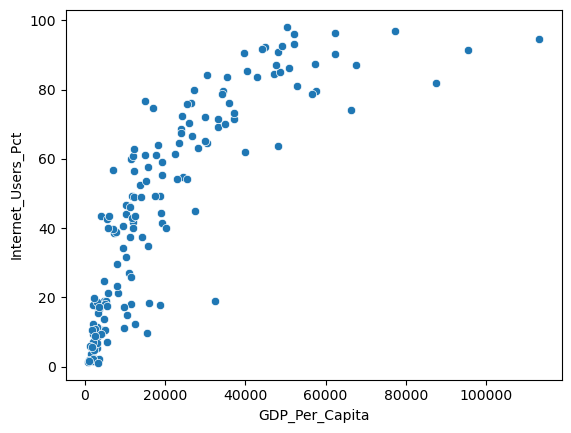

In [124]:
sns.scatterplot(data = gdp_internet_use_2014, x='GDP_Per_Capita', y = 'Internet_Users_Pct')